# Importing Dependencies

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Load dataset and save as 'wine' variable

In [198]:
wine = pd.read_json('./wine-reviews/winemag-data-130k-v2.json', dtype='unicode');

# Reviewing dataset

### Looking a data head for overview

In [199]:
wine.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


### Looking a data index to see how many rows the dataset contains

In [200]:
wine.index

RangeIndex(start=0, stop=129971, step=1)

### Looking a data columns

In [201]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

### Reviewing shape of dataset

In [202]:
wine.shape

(129971, 13)

### Reviewing data types 

In [203]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null object
description              129971 non-null object
designation              129971 non-null object
points                   129971 non-null object
price                    129971 non-null object
province                 129971 non-null object
region_1                 129971 non-null object
region_2                 129971 non-null object
taster_name              129971 non-null object
taster_twitter_handle    129971 non-null object
title                    129971 non-null object
variety                  129971 non-null object
winery                   129971 non-null object
dtypes: object(13)
memory usage: 12.9+ MB


### Reviewing if there are any null values

In [204]:
wine.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

### Changing points and price to integar and float after noticing that those values were not the appropriate dtype

In [205]:
wine['points'] = wine.points.astype(int)
wine['price'] = wine.price.astype(float)
wine.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


### Confirming updated dtypes

In [206]:
wine.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

### Rechecking null values after dtype change

In [207]:
wine.isnull().sum()

country                     0
description                 0
designation                 0
points                      0
price                    8996
province                    0
region_1                    0
region_2                    0
taster_name                 0
taster_twitter_handle       0
title                       0
variety                     0
winery                      0
dtype: int64

### Checking for duplicates via title and sorting by title

#### Not really duplicates due to designation and variety

In [208]:
wine[wine.duplicated(['title'])].sort_values('title')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
93375,Spain,Dusty notes of citrus fruits are mild but frie...,Brut,87,16.0,Catalonia,Cava,None,Michael Schachner,@wineschach,1+1=3 NV Brut Sparkling (Cava),Sparkling Blend,1+1=3
56109,Spain,"Clean, fresh apple aromas and a minerally, cit...",Cygnus Brut Nature Reserva Made With Organic G...,89,20.0,Catalonia,Cava,None,Michael Schachner,@wineschach,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Sparkling Blend,1+1=3
100235,US,"Merlot, Cabernet and Syrah form the core of th...",Hot To Trot,86,10.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,14 Hands 2011 Hot To Trot Red (Columbia Valley...,Red Blend,14 Hands
68750,US,In just a few years 14 Hands Riesling producti...,None,88,10.0,Washington,Washington,Washington Other,Paul Gregutt,@paulgwine,14 Hands 2013 Riesling (Washington),Riesling,14 Hands
57235,US,Dried herb and wood spice aromas are followed ...,The Reserve,90,30.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2013 The Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,14 Hands
26499,US,"Aromas are light, with notes of matchstick, he...",Limited Release Kentucky Derby,87,12.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2014 Limited Release Kentucky Derby R...,Red Blend,14 Hands
116037,US,"The aromas of barrel spice, toast, herb and pl...",None,88,12.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands 2015 Cabernet Sauvignon (Columbia Val...,Cabernet Sauvignon,14 Hands
108391,US,"Light aromas of lemon, apple, pineapple, toast...",Brut Méthode Champenoise,87,15.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,14 Hands NV Brut Méthode Champenoise Sparkling...,Sparkling Blend,14 Hands
73229,US,This is the inaugural release from this Oregon...,Proprietary,92,75.0,Oregon,Walla Walla Valley (OR),Oregon Other,Sean P. Sullivan,@wawinereport,18401 Cellars 2013 Proprietary Red (Walla Wall...,Bordeaux-style Red Blend,18401 Cellars
92133,Portugal,"With aromas of superripe fruit, this wood aged...",Vinhas Velhas Branco,90,NaN,Douro,None,None,Roger Voss,@vossroger,1912 Winemakers 2011 Vinhas Velhas Branco Whit...,Portuguese White,1912 Winemakers


### Counting region 1

#### 21,247 entries do not have a region 1 assigned

In [228]:
wine.region_1.value_counts()

None                                                 21247
Napa Valley                                           4480
Columbia Valley (WA)                                  4124
Russian River Valley                                  3091
California                                            2629
Paso Robles                                           2350
Mendoza                                               2301
Willamette Valley                                     2301
Alsace                                                2163
Champagne                                             1613
Barolo                                                1599
Finger Lakes                                          1565
Sonoma Coast                                          1474
Brunello di Montalcino                                1470
Rioja                                                 1469
Sonoma County                                         1246
Toscana                                               11

### Counting Region 2

#### 79,460 entries do not have a region 2 assigned

In [210]:
wine.region_2.value_counts()

None                 79460
Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

### Counting Countries

In [211]:
wine.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
None                         63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

### Counting Provinces

In [212]:
wine.province.value_counts()

California                   36247
Washington                    8639
Bordeaux                      5941
Tuscany                       5897
Oregon                        5373
Burgundy                      3980
Northern Spain                3851
Piedmont                      3729
Mendoza Province              3264
Veneto                        2716
New York                      2688
Alsace                        2440
Northeastern Italy            2138
Loire Valley                  1856
Sicily & Sardinia             1797
Champagne                     1613
Southwest France              1503
Southern Italy                1349
South Australia               1349
Provence                      1346
Douro                         1281
Central Italy                 1233
Catalonia                     1164
Rhône Valley                  1081
Beaujolais                    1044
Mosel                         1039
Alentejano                     937
Colchagua Valley               830
Marlborough         

### Counting variety types

In [213]:
wine.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

### Summary Statistics

In [214]:
wine.describe() 

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Point review stats for a bottle of wine by country

In [215]:
wine.groupby('country').points.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
US,54504.0,88.563720,3.114840,80.0,86.0,88.0,91.00,100.0
France,22093.0,88.845109,3.044423,80.0,87.0,89.0,91.00,100.0
Italy,19540.0,88.562231,2.649756,80.0,87.0,88.0,90.00,100.0
Spain,6645.0,87.288337,3.066284,80.0,85.0,87.0,89.00,98.0
Portugal,5691.0,88.250220,2.996122,80.0,86.0,88.0,90.00,100.0
Chile,4472.0,86.493515,2.692959,80.0,85.0,86.0,88.00,95.0
Argentina,3800.0,86.710263,3.179627,80.0,84.0,87.0,89.00,97.0
Austria,3345.0,90.101345,2.499799,82.0,88.0,90.0,92.00,98.0
Australia,2329.0,88.580507,2.989900,80.0,87.0,89.0,91.00,100.0


### Price stats for a bottle of wine by country

In [216]:
wine.groupby('country').price.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
US,54265.0,36.573464,27.088857,4.0,20.00,30.0,45.00,2013.0
France,17776.0,41.139120,73.769404,5.0,16.00,25.0,43.00,3300.0
Italy,16914.0,39.663770,38.052479,5.0,18.00,28.0,50.00,900.0
Spain,6573.0,28.215275,34.662397,4.0,13.00,18.0,30.00,770.0
Portugal,4875.0,26.218256,41.175241,5.0,12.00,16.0,28.00,1000.0
Chile,4416.0,20.786458,21.929371,5.0,12.00,15.0,20.00,400.0
Argentina,3756.0,24.510117,23.430122,4.0,12.00,17.0,25.00,230.0
Austria,2799.0,30.762772,27.224797,7.0,18.00,25.0,36.50,1100.0
Australia,2294.0,35.437663,49.049458,5.0,15.00,21.0,38.00,850.0


### Price stats for a bottle of wine by province

In [217]:
wine.groupby('province').price.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
California,36104.0,39.041048,30.259982,4.0,22.0,33.0,48.00,2013.0
Washington,8583.0,32.436444,18.559569,6.0,20.0,29.0,40.00,240.0
Oregon,5359.0,36.545064,20.224731,5.0,22.0,30.0,48.00,275.0
Tuscany,5128.0,47.683697,47.274103,6.0,21.0,35.0,60.00,900.0
Bordeaux,4002.0,38.911794,108.573516,6.0,15.0,20.0,33.00,3300.0
Northern Spain,3797.0,30.771925,38.876613,5.0,13.0,19.0,32.00,600.0
Mendoza Province,3226.0,25.053317,24.044538,4.0,12.0,17.0,26.00,230.0
Burgundy,3106.0,71.058274,101.446213,9.0,26.0,43.0,78.00,2500.0
Piedmont,3089.0,54.957268,43.568957,7.0,27.0,49.0,70.00,595.0


### Point review stats for a bottle of wine by province

In [218]:
wine.groupby('province').points.describe().sort_values(['count','mean'], ascending=False).head(25)

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
California,36247.0,88.627776,3.254020,80.0,86.0,89.0,91.0,100.0
Washington,8639.0,88.947216,2.654835,80.0,87.0,89.0,91.0,100.0
Bordeaux,5941.0,88.658980,3.252326,80.0,86.0,88.0,91.0,100.0
Tuscany,5897.0,89.074614,2.644699,80.0,87.0,89.0,91.0,100.0
Oregon,5373.0,89.051926,2.802526,80.0,87.0,89.0,91.0,99.0
Burgundy,3980.0,89.569347,3.110104,81.0,87.0,90.0,92.0,99.0
Northern Spain,3851.0,87.417035,3.153075,80.0,85.0,87.0,90.0,98.0
Piedmont,3729.0,89.536873,2.822597,82.0,87.0,89.0,92.0,99.0
Mendoza Province,3264.0,86.826593,3.233570,80.0,84.0,87.0,89.0,97.0


In [219]:
wine.describe(include=['object'])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971,129971,129971,129971,129971,129971,129971,129971,129971,129971,129971
unique,44,119955,37980,426,1230,18,20,16,118840,708,16757
top,US,"Stalky aromas suggest hay and green herbs, wit...",None,California,None,None,None,None,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,37465,36247,21247,79460,26244,31213,11,13272,222


### Avg. price for a bottle of wine

In [220]:
wine.price.mean()

35.363389129985535

### Avg. point review for a bottle of wine

In [221]:
wine.points.mean()

88.44713820775404

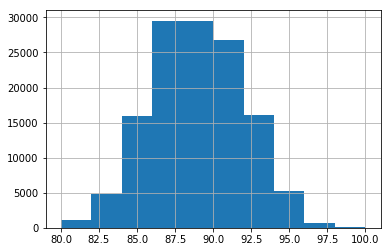

In [222]:
wine.points.hist(bins=10);

In [223]:
wine.sort_values(['points', 'price'])  

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
23437,Argentina,Candied plum and red berry aromas smell like r...,Estate Bottled,80,5.0,Mendoza Province,Mendoza,None,Michael Schachner,@wineschach,Terrenal 2013 Estate Bottled Malbec (Mendoza),Malbec,Terrenal
125826,Argentina,"While this smells floral and candied, the pala...",None,80,5.0,Mendoza Province,Mendoza,None,Michael Schachner,@wineschach,Toca Diamonte 2010 Malbec (Mendoza),Malbec,Toca Diamonte
34501,Chile,"Neutral aromas, sour apple and citrus flavors,...",None,80,6.0,Curicó Valley,None,None,Michael Schachner,@wineschach,Quasar 2009 Chardonnay (Curicó Valley),Chardonnay,Quasar
81390,Spain,"Very light, even thin, this white lacks the st...",Mediterranean White,80,6.0,Catalonia,Catalonia,None,None,None,René Barbier NV Mediterranean White White (Cat...,White Blend,René Barbier
99996,Chile,"The nose is sulphuric and a bit barnyardy, whi...",Estate,80,6.0,Maipo Valley,None,None,Michael Schachner,@wineschach,Santa Alicia 2001 Estate Chardonnay (Maipo Val...,Chardonnay,Santa Alicia
13782,Chile,"Yeasty, melony and smelling like yellow mustar...",Left Coast,80,7.0,Chile,None,None,Michael Schachner,@wineschach,flipflop NV Left Coast Moscato (Chile),Moscato,flipflop
34500,Chile,Average peach and apple aromas are as good as ...,Un-Oaked,80,7.0,Colchagua Valley,None,None,Michael Schachner,@wineschach,La Playa 2009 Un-Oaked Chardonnay (Colchagua V...,Chardonnay,La Playa
36194,Chile,"Tropical, citrusy aromas are about as good as ...",None,80,7.0,Central Valley,None,None,Michael Schachner,@wineschach,Beach Kite 2012 Moscato (Central Valley),Moscato,Beach Kite
54292,Spain,Dusty apple and papaya aromas lack fortitude. ...,None,80,7.0,Central Spain,La Mancha,None,Michael Schachner,@wineschach,Despierta 2014 Chardonnay (La Mancha),Chardonnay,Despierta
75555,Spain,"This affordable sparkler starts off with odd, ...",Carta Nevada Brut,80,7.0,Catalonia,Penedès,None,None,None,Freixenet NV Carta Nevada Brut (Penedès),Champagne Blend,Freixenet


In [224]:
wine[wine['region_2'] == 'Central Coast'].describe()

,points,price
count,11065.000000,10975.000000
mean,88.825395,35.743326
std,3.180413,26.295086
min,80.000000,7.000000
25%,87.000000,24.000000
50%,89.000000,33.000000
75%,91.000000,45.000000
max,97.000000,2013.000000


points    0.416167
price     1.000000
Name: price, dtype: float64


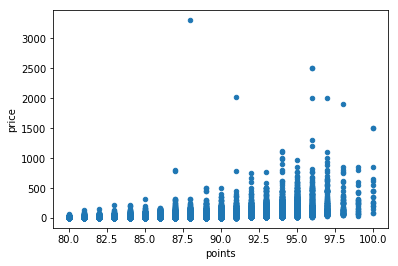

In [226]:
# Are beer servings and spirit servings correlated?
wine.plot(kind='scatter', x='points', y='price')

print((wine.corr()['price']))  # Correlation coefficients